In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df1 = pd.read_csv('data.csv')
df1.head()

,time_iso8601,source,DE-BW_cases,DE-BW_deaths,DE-BY_cases,DE-BY_deaths,DE-BE_cases,DE-BE_deaths,DE-BB_cases,DE-BB_deaths,DE-HB_cases,DE-HB_deaths,DE-HH_cases,DE-HH_deaths,DE-HE_cases,DE-HE_deaths,DE-MV_cases,DE-MV_deaths,DE-NI_cases,DE-NI_deaths,DE-NW_cases,DE-NW_deaths,DE-RP_cases,DE-RP_deaths,DE-SL_cases,DE-SL_deaths,DE-SN_cases,DE-SN_deaths,DE-SH_cases,DE-SH_deaths,DE-ST_cases,DE-ST_deaths,DE-TH_cases,DE-TH_deaths,sum_cases,sum_deaths
0,2020-03-10T12:00:00+01:00,RKI PDF,237,0,314,0,48,0,9,0,4,0,29,0,35,0,13,0,49,0,484,0,25,0,7,0,22,0,9,0,7,0,4,0,1296,0
1,2020-03-11T12:00:00+01:00,RKI PDF,277,0,366,0,90,0,24,0,21,0,48,0,48,0,17,0,75,0,484,0,25,0,14,0,26,0,27,0,15,0,10,0,1567,0
2,2020-03-12T12:00:00+01:00,RKI PDF,454,0,500,0,137,0,30,0,38,0,88,0,99,0,23,0,129,0,688,0,52,0,14,0,45,0,31,0,27,0,14,0,2369,0
3,2020-03-13T12:00:00+01:00,RKI PDF,454,0,558,0,174,0,44,0,42,0,99,0,148,0,33,0,230,0,936,0,102,0,40,0,83,0,48,0,42,0,29,0,3062,0
4,2020-03-14T12:00:00+01:00,RKI PDF,569,0,681,0,216,0,61,0,50,0,158,0,203,0,45,0,253,0,1154,0,121,0,40,0,93,0,60,0,45,0,46,0,3795,0


In [3]:
df=df1[['time_iso8601','sum_cases']].copy()


 #df3 = df1[['ticker_symbol']].copy()
  #  df3['ASX code'] = df2[['ASX code']].copy()

In [4]:
df.head()

,time_iso8601,sum_cases
0,2020-03-10T12:00:00+01:00,1296
1,2020-03-11T12:00:00+01:00,1567
2,2020-03-12T12:00:00+01:00,2369
3,2020-03-13T12:00:00+01:00,3062
4,2020-03-14T12:00:00+01:00,3795


In [5]:
df.rename(columns={"time_iso8601": "ds", "sum_cases": "y"}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      155 non-null    object
 1   y       155 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [7]:
df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
df['ds']= pd.to_datetime(df['ds'],format='%Y-%m-%d',utc=True)

In [9]:
df['ds']=df['ds'].astype('datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      155 non-null    datetime64[ns]
 1   y       155 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [11]:
df.head()

,ds,y
0,2020-03-10 11:00:00,1296
1,2020-03-11 11:00:00,1567
2,2020-03-12 11:00:00,2369
3,2020-03-13 11:00:00,3062
4,2020-03-14 11:00:00,3795


In [12]:
from datetime import datetime as dt

In [13]:

df['ds'] = pd.to_datetime(df['ds']).dt.date

In [14]:
df['ds']

0      2020-03-10
1      2020-03-11
2      2020-03-12
3      2020-03-13
4      2020-03-14
          ...    
150    2020-12-07
151    2020-12-09
152    2020-12-10
153    2020-12-11
154    2020-12-12
Name: ds, Length: 155, dtype: object

In [15]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
515,2021-12-08
516,2021-12-09
517,2021-12-10
518,2021-12-11
519,2021-12-12


In [17]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
515,2021-12-08,7.907085e+06,5.725350e+06,9.988704e+06
516,2021-12-09,7.927490e+06,5.737055e+06,1.002007e+07
517,2021-12-10,7.949124e+06,5.751982e+06,1.005638e+07
518,2021-12-11,7.968832e+06,5.764638e+06,1.008443e+07
519,2021-12-12,7.985087e+06,5.767741e+06,1.010852e+07


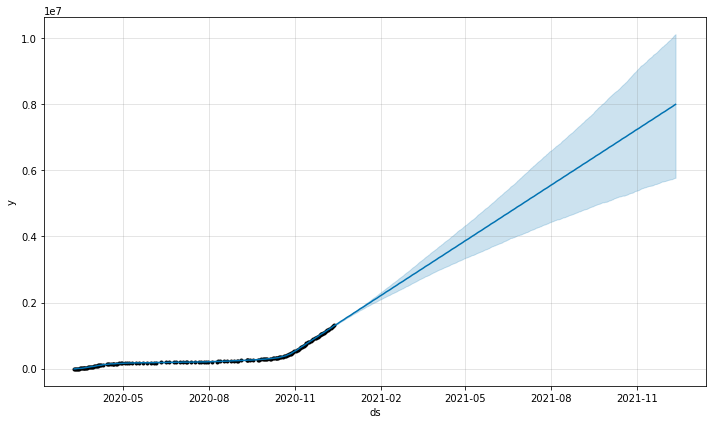

In [18]:
fig1 = m.plot(forecast)


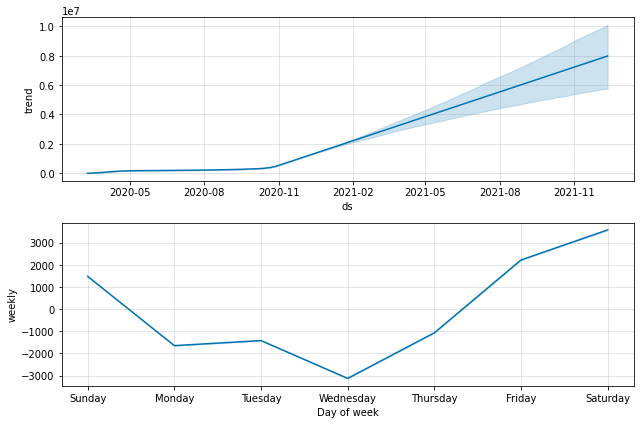

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [21]:
plot_components_plotly(m, forecast)


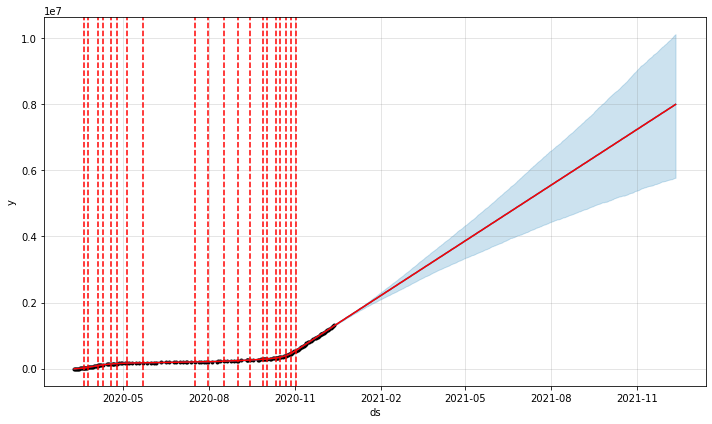

In [22]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


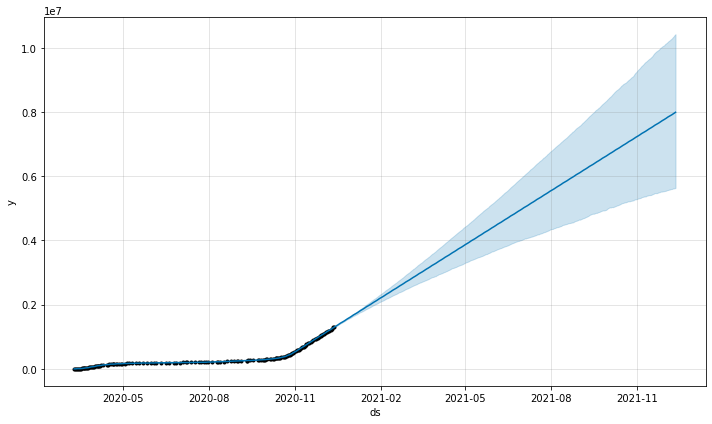

In [23]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


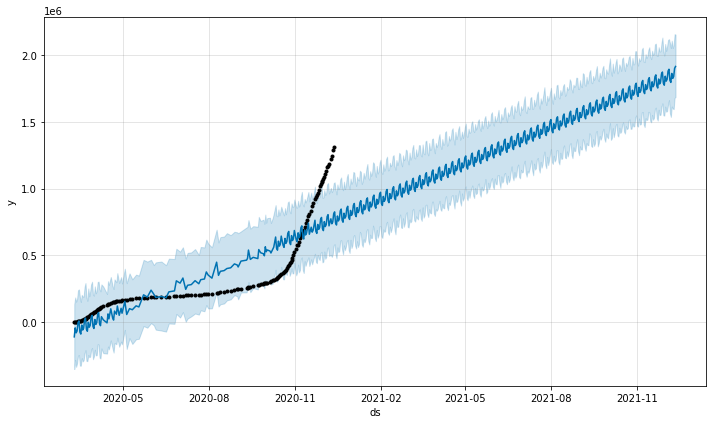

In [24]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

#Manually Adding the Change Points

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


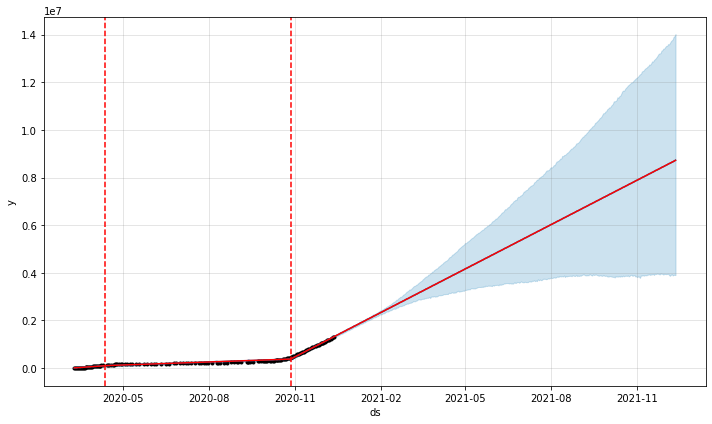

In [25]:
m = Prophet(changepoints=['2020-04-12','2020-10-27']) # specifying change points
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [26]:
split_date = '2020-11-27'
split_date = pd.to_datetime(split_date,format='%Y-%m-%d',utc=True)
data_train = df.loc[df['ds'] <= split_date].copy()
data_test = df.loc[df['ds'] > split_date].copy()

In [27]:
m1 = Prophet()
m1.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
data_test.head()

,ds,y
141,2020-11-28,1034712
142,2020-11-29,1051036
143,2020-11-30,1056836
144,2020-12-01,1071065
145,2020-12-02,1087507


In [29]:
y_pred = m1.predict(data_test)
y_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
9,2020-12-07,1.184200e+06,1.176621e+06,1.192773e+06
10,2020-12-09,1.218544e+06,1.208796e+06,1.230619e+06
11,2020-12-10,1.238342e+06,1.227615e+06,1.250460e+06
12,2020-12-11,1.258642e+06,1.246183e+06,1.273238e+06
13,2020-12-12,1.276408e+06,1.262788e+06,1.292572e+06


In [30]:
data_test['y']

141    1034712
142    1051036
143    1056836
144    1071065
145    1087507
146    1109081
147    1133657
148    1160387
149    1172573
150    1186908
151    1221609
152    1246528
153    1289606
154    1313482
Name: y, dtype: int64

In [31]:
y_pred['yhat']

0     1.025643e+06
1     1.044755e+06
2     1.058818e+06
3     1.076756e+06
4     1.093162e+06
5     1.112959e+06
6     1.133260e+06
7     1.151026e+06
8     1.170137e+06
9     1.184200e+06
10    1.218544e+06
11    1.238342e+06
12    1.258642e+06
13    1.276408e+06
Name: yhat, dtype: float64

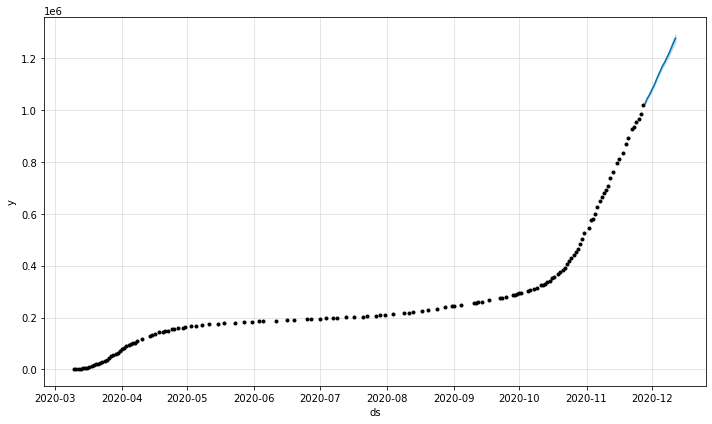

In [32]:
fig_test = m1.plot(y_pred)

In [ ]:
import math 
mse = sm.mean_squared_error(data_test['y'], y_pred['yhat'])

rmse = math.sqrt(mse)

print("RMSE:",rmse)

RMSE: 13927.602007044028


In [ ]:
import numpy as np
np.mean(data_test['y'])

1152499.0714285714

In [ ]:
data_train['cap'] = 83906168
data_test['cap'] = 83906168 #1.025643e+06

m1_logistic = Prophet(growth='logistic')
m1_logistic.fit(data_train)

y_pred_log = m1_logistic.predict(data_test)
y_pred_log[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
9,2020-12-07,62571.877258,-396594.486728,532601.847821
10,2020-12-09,45949.467072,-443709.789120,520079.875552
11,2020-12-10,73573.817812,-371709.094678,516711.888866
12,2020-12-11,82174.908377,-415847.647146,564169.794101
13,2020-12-12,-160254.717822,-675517.649464,308762.577108


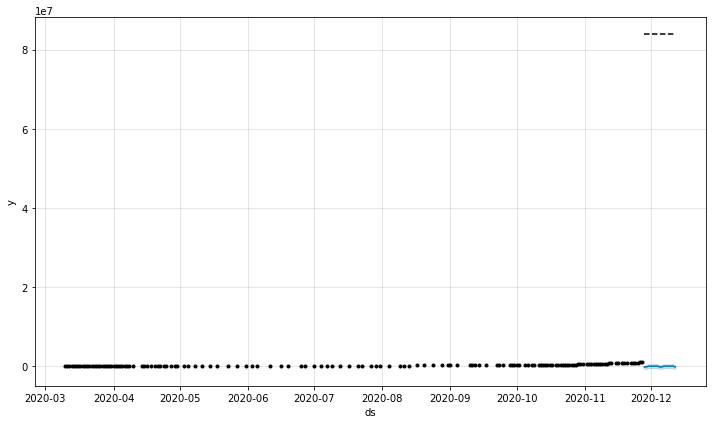

In [ ]:
fig = m1_logistic.plot(y_pred_log)

In [ ]:
import math 
mse = sm.mean_squared_error(data_test['y'], y_pred_log['yhat'])

rmse = math.sqrt(mse)

print(rmse)

1173705.107675736


In [33]:
import sklearn.metrics as sm

print("Explain variance score =", round(sm.explained_variance_score(data_test['y'], y_pred['yhat']), 2)) 
print("R2 score =", round(sm.r2_score(data_test['y'], y_pred['yhat']), 2))

Explain variance score = 0.98
R2 score = 0.97


In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [35]:
#setting 'date' column as index columna as forecasting will be done for this column
#making 'TT' as float for statistical calculations
train_df =data_train
train_df = train_df.set_index('ds')
train_df['y'] = train_df['y'].astype(float)

train_df.head()

,y
ds,
2020-03-10,1296.0
2020-03-11,1567.0
2020-03-12,2369.0
2020-03-13,3062.0
2020-03-14,3795.0


<Figure size 432x288 with 0 Axes>

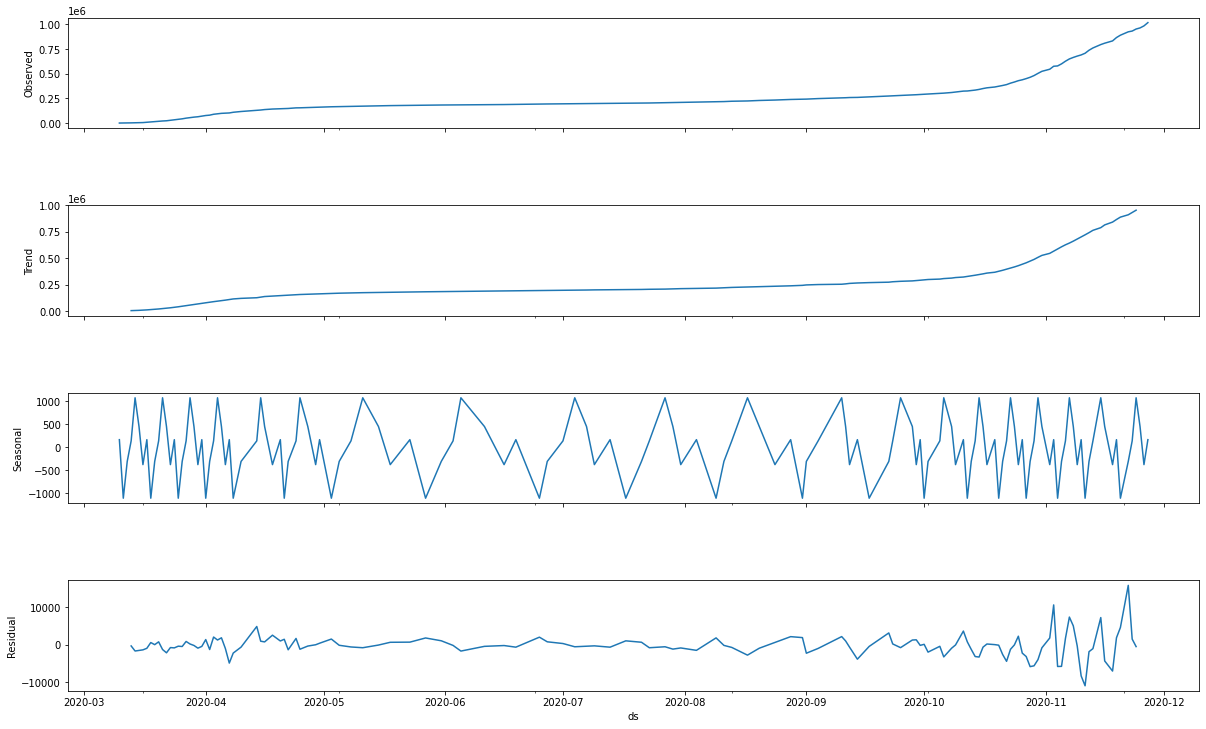

In [36]:
#Decomposing data to observe if there exists a sesional trend

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['y'], model='additive',freq=7)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 12)


In [37]:
from statsmodels.tsa.stattools import adfuller #adfuller stands for Augmented Dickey-Fuller unit root test.

#The function find mean and standard deviation of the series and and performs augmented dickey fuller test.
#returns pvale .. The samaller the pvalue more stationary is the series.

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

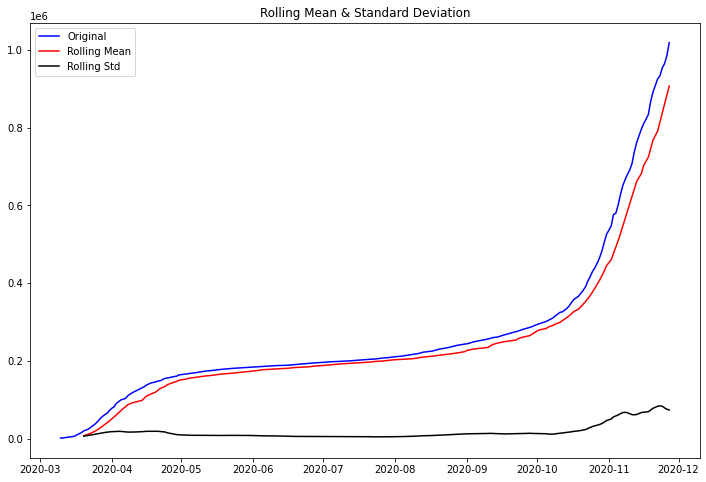

Results of Dickey-Fuller Test:
p-value = 0.9942. The series is likely non-stationary.
Test Statistic                   0.991656
p-value                          0.994177
#Lags Used                      11.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [38]:

test_stationarity(train_df['y'],window = 11)
#calling the function gives below result , where we can observe the huge gap between orignal data and mean,std
#also the pvalue is 0.9778 which is not so good and hence , the output says "The series is likely non-stationary."

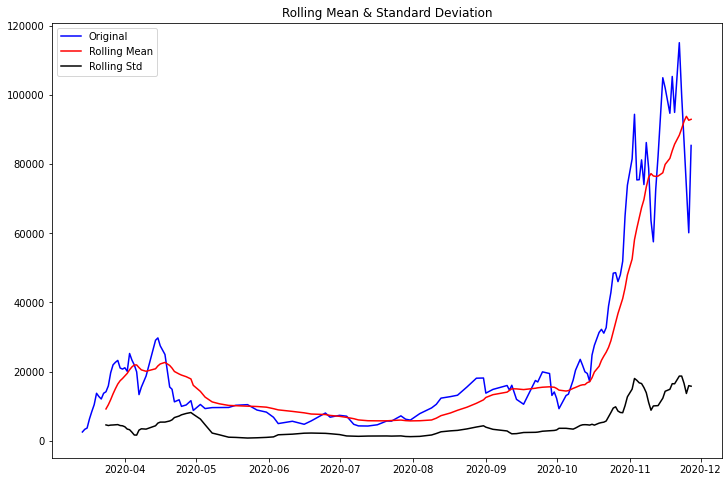

Results of Dickey-Fuller Test:
p-value = 0.9806. The series is likely non-stationary.
Test Statistic                   0.376599
p-value                          0.980598
#Lags Used                      13.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [39]:
#here are various methods for making series stationary like log, differencing and so on..
#here we are using differencing , shift operator shifts the 'TT' cloumn of df by 4 places and difference is taken.

#plotting the data after differencing we see the pvalue is reduced to 0.3427 which is quite good as compared to our previous value 0.9778
#you can try different values in shift to reduce the pvalue (if possible , #try to choose one where number of observations used is MAX abd pval is MIN)
first_diff = train_df.y - train_df.y.shift(4)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 11)

In [40]:

import statsmodels.api as sm
def acf_pacf(train_df):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(train_df.y, ax=ax1, ) # using default value of lag
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(train_df.y, ax=ax2) # using default value of lag

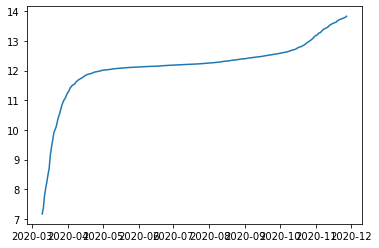

In [41]:
df_log = np.log(train_df.y )
plt.plot(df_log)

In [42]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

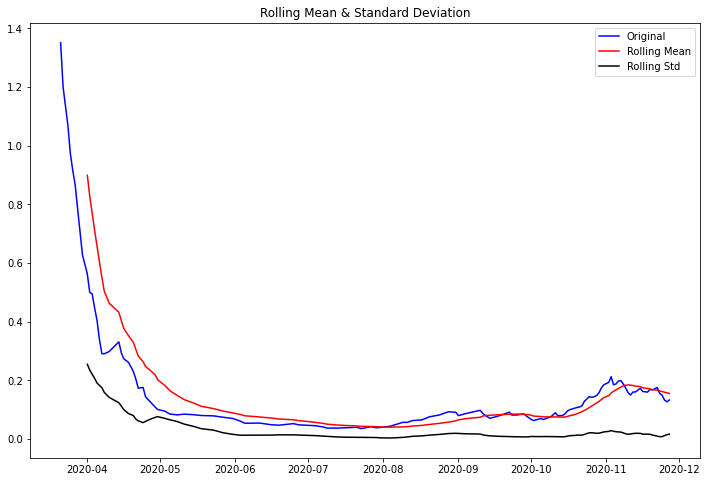

Results of Dickey-Fuller Test:
p-value = 0.0441. The series is likely non-stationary.
Test Statistic                  -2.910836
p-value                          0.044102
#Lags Used                       7.000000
Number of Observations Used    122.000000
Critical Value (1%)             -3.485122
Critical Value (5%)             -2.885538
Critical Value (10%)            -2.579569
dtype: float64


In [43]:
test_stationarity(df_log_minus_mean, window = 12)

In [44]:

df_log_minus_mean = pd.DataFrame({'ds':df_log_minus_mean.index, 'y':df_log_minus_mean.values})


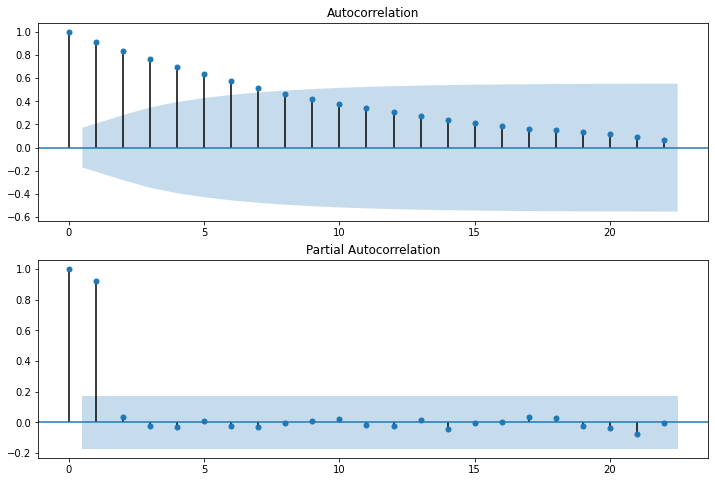

In [45]:
acf_pacf(df_log_minus_mean)

In [46]:
# we can see a recurring correlation exists in both ACF and PACF hece we should choose SARIMAX model which also deals with seasonality

#RULE : A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that 
      #the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that 
      #the original series has a time-varying trend 

#Since our series has a contant average trend ( with growth ) we would take I = 1 and MA = 0 ( I-1 ).


sarimax_mod = sm.tsa.statespace.SARIMAX(train_df.y, order=(11, 1, 0), seasonal_order=(0, 0, 0, 0), trend='ct').fit()
print(sarimax_mod.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  141
Model:              SARIMAX(11, 1, 0)   Log Likelihood               -1353.616
Date:                Tue, 15 Dec 2020   AIC                           2735.231
Time:                        15:04:08   BIC                           2776.414
Sample:                             0   HQIC                          2751.967
                                - 141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -516.0000    873.236     -0.591      0.555   -2227.510    1195.510
drift         23.0626     16.859      1.368      0.171      -9.981      56.106
ar.L1          0.2119      0.105      2.012      0.0

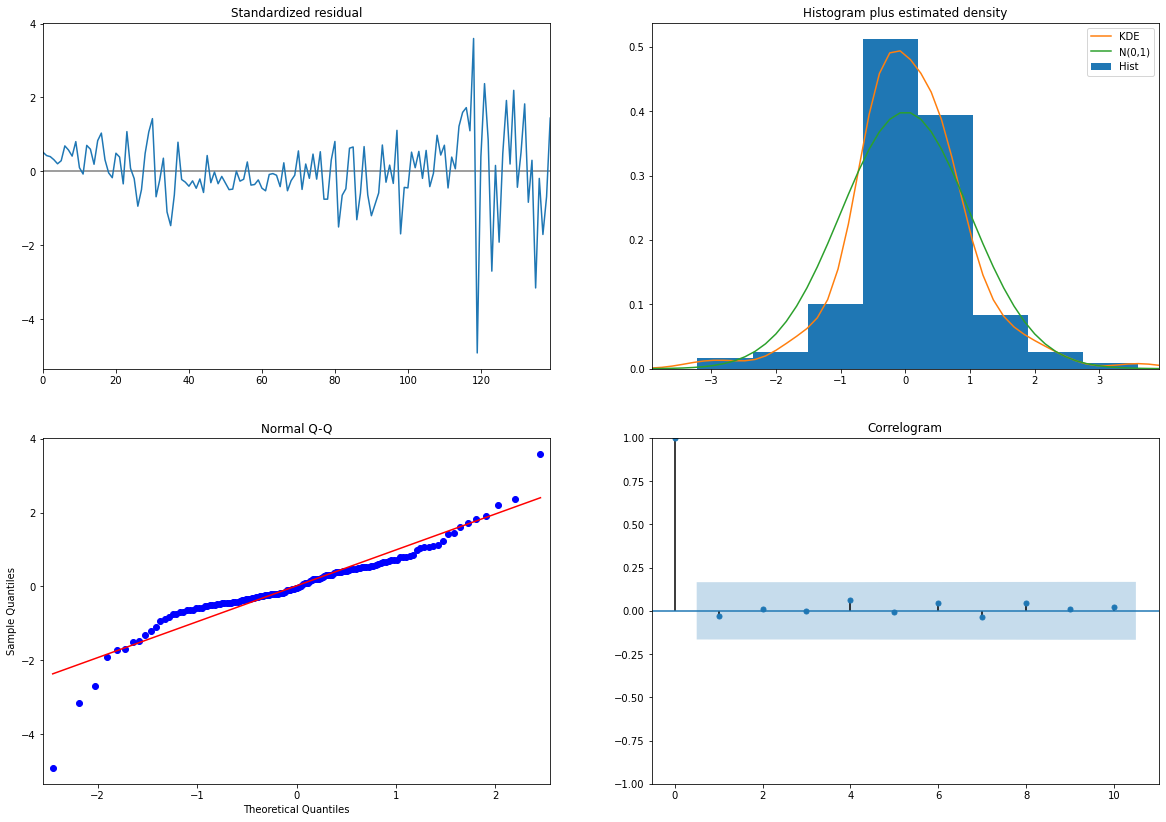

In [47]:
sarimax_mod.plot_diagnostics(figsize=(20, 14))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



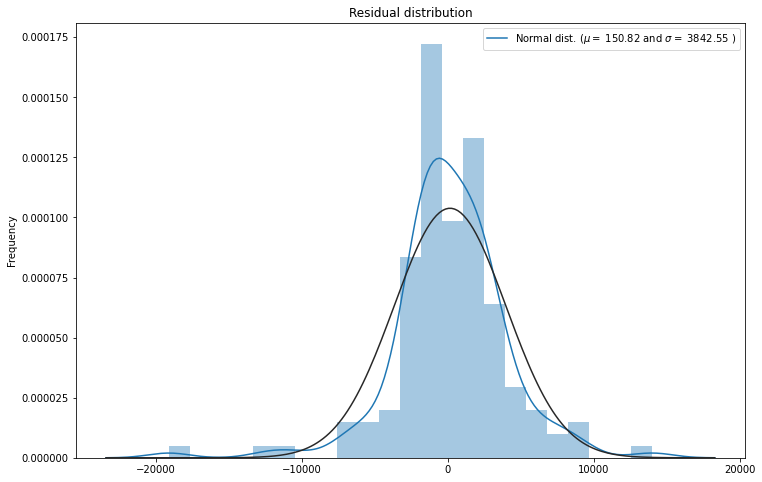

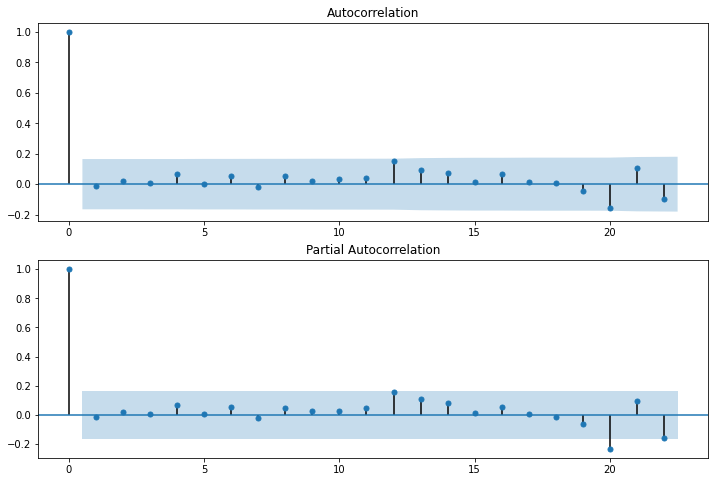

In [48]:
import scipy.stats as stats
import seaborn as sns # informative statistical graphics.
import statsmodels.api as sm #for ARIMA and SARIMAX
resid = sarimax_mod.resid #gives residual degree of freedom (mu, sigma, pvalue ... )

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_mod.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_mod.resid, ax=ax2)

In [49]:
future_predict=sarimax_mod.forecast(steps=16)
future_predict=pd.DataFrame(future_predict)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [50]:
sarimax_mod.predict(3,130)

ds
2020-03-13      1101.229287
2020-03-14      2260.784881
2020-03-15      3957.709200
2020-03-16      4785.836116
2020-03-17      6443.374256
                  ...      
2020-11-10    698781.230252
2020-11-11    706336.246032
2020-11-12    731240.477521
2020-11-13    761181.755070
2020-11-15    787783.545961
Length: 128, dtype: float64

In [51]:
future_predict['ds']=data_test['ds']

In [52]:
future_predict['ds']

141    2020-11-28
142    2020-11-29
143    2020-11-30
144    2020-12-01
145    2020-12-02
146    2020-12-03
147    2020-12-04
148    2020-12-05
149    2020-12-06
150    2020-12-07
151    2020-12-09
152    2020-12-10
153    2020-12-11
154    2020-12-12
155           NaN
156           NaN
Name: ds, dtype: object

In [53]:
future_predict = future_predict.set_index('ds')
data_test = data_test.set_index('ds')

In [77]:
future_predict = future_predict.iloc[:-2]

In [95]:
df_dropped_last_n.iloc[:]

,0
ds,
2020-11-28,1.040358e+06
2020-11-29,1.065224e+06
2020-11-30,1.080067e+06
2020-12-01,1.107242e+06
2020-12-02,1.132888e+06
2020-12-03,1.164358e+06
2020-12-04,1.190798e+06
2020-12-05,1.212341e+06
2020-12-06,1.235485e+06


In [78]:
future_predict

,0
ds,
2020-11-28,1.040358e+06
2020-11-29,1.065224e+06
2020-11-30,1.080067e+06
2020-12-01,1.107242e+06
2020-12-02,1.132888e+06
2020-12-03,1.164358e+06
2020-12-04,1.190798e+06
2020-12-05,1.212341e+06
2020-12-06,1.235485e+06


In [92]:
data_test.iloc[:,-1]

ds
2020-11-28    1034712
2020-11-29    1051036
2020-11-30    1056836
2020-12-01    1071065
2020-12-02    1087507
2020-12-03    1109081
2020-12-04    1133657
2020-12-05    1160387
2020-12-06    1172573
2020-12-07    1186908
2020-12-09    1221609
2020-12-10    1246528
2020-12-11    1289606
2020-12-12    1313482
Name: y, dtype: int64

In [97]:
np.mean(data_test) #1152499

y    1.152499e+06
dtype: float64

In [96]:
import math 
import sklearn.metrics as sm

mse = sm.mean_squared_error(data_test, future_predict)

rmse = math.sqrt(mse)

print("RMSE:",rmse)

RMSE: 51513.64193426213


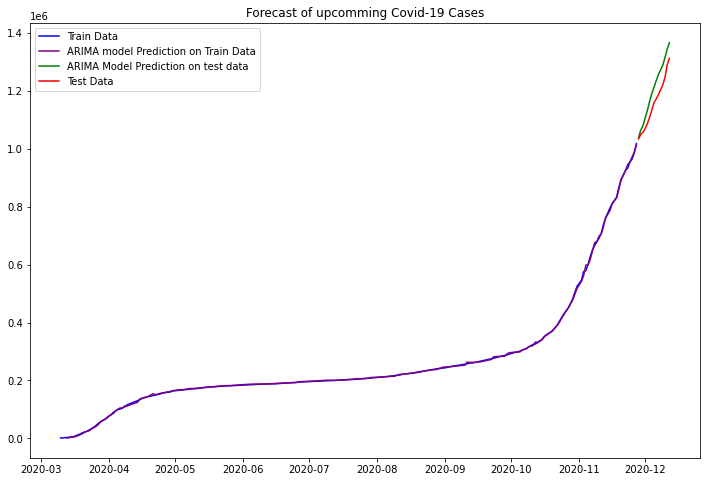

In [62]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(train_df, color='blue',label='Train Data')
pred_train=plt.plot(sarimax_mod.predict(3,140),color='purple',label='ARIMA model Prediction on Train Data')
fore = plt.plot(future_predict, color='green', label='ARIMA Model Prediction on test data')
fes = plt.plot(data_test, color='red', label='Test Data')
plt.legend(loc='best')
plt.title('Forecast of upcomming Covid-19 Cases')
plt.show()

In [63]:
# Stacked LSTM for covid-19 problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset


#dataset = dataset.astype('float32')

In [64]:
df

,ds,y
0,2020-03-10,1296
1,2020-03-11,1567
2,2020-03-12,2369
3,2020-03-13,3062
4,2020-03-14,3795
...,...,...
150,2020-12-07,1186908
151,2020-12-09,1221609
152,2020-12-10,1246528
153,2020-12-11,1289606


In [65]:
dataset=df

In [66]:
dataset = dataset.set_index('ds')

In [67]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
X_train, y_train= create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [68]:
new_data=pd.DataFrame(X_train)
new_data

,0,1,2
0,0.000000,0.000207,0.000818
1,0.000207,0.000818,0.001346
2,0.000818,0.001346,0.001904
3,0.001346,0.001904,0.002699
4,0.001904,0.002699,0.003594
...,...,...,...
115,0.366486,0.383395,0.399310
116,0.383395,0.399310,0.415456
117,0.399310,0.415456,0.438435
118,0.415456,0.438435,0.440880


In [69]:
# reshape input to be [samples, time steps, features]
X_tr_t = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_tst_t = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [70]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [71]:

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_tr_t , y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=False)

Epoch 1/100
120/120 - 0s - loss: 0.0018
Epoch 2/100
120/120 - 0s - loss: 0.0480
Epoch 3/100
120/120 - 0s - loss: 0.0165
Epoch 4/100
120/120 - 0s - loss: 0.0092
Epoch 5/100
120/120 - 0s - loss: 0.0059
Epoch 6/100
120/120 - 0s - loss: 0.0041
Epoch 7/100
120/120 - 0s - loss: 0.0032
Epoch 8/100
120/120 - 0s - loss: 0.0028
Epoch 9/100
120/120 - 0s - loss: 0.0025
Epoch 10/100
120/120 - 0s - loss: 0.0024
Epoch 11/100
120/120 - 0s - loss: 0.0022
Epoch 12/100
120/120 - 0s - loss: 0.0020
Epoch 13/100
120/120 - 0s - loss: 0.0019
Epoch 14/100
120/120 - 0s - loss: 0.0018
Epoch 15/100
120/120 - 0s - loss: 0.0016
Epoch 16/100
120/120 - 0s - loss: 0.0015
Epoch 17/100
120/120 - 0s - loss: 0.0014
Epoch 18/100
120/120 - 0s - loss: 0.0013
Epoch 19/100
120/120 - 0s - loss: 0.0012
Epoch 20/100
120/120 - 0s - loss: 0.0012
Epoch 21/100
120/120 - 0s - loss: 0.0011
Epoch 22/100
120/120 - 0s - loss: 0.0010
Epoch 23/100
120/120 - 0s - loss: 9.6518e-04
Epoch 24/100
120/120 - 0s - loss: 9.0662e-04
Epoch 25/100
120/

In [72]:

import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_tr_t, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_tst_t, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11275.11 RMSE
Test Score: 74902.51 RMSE


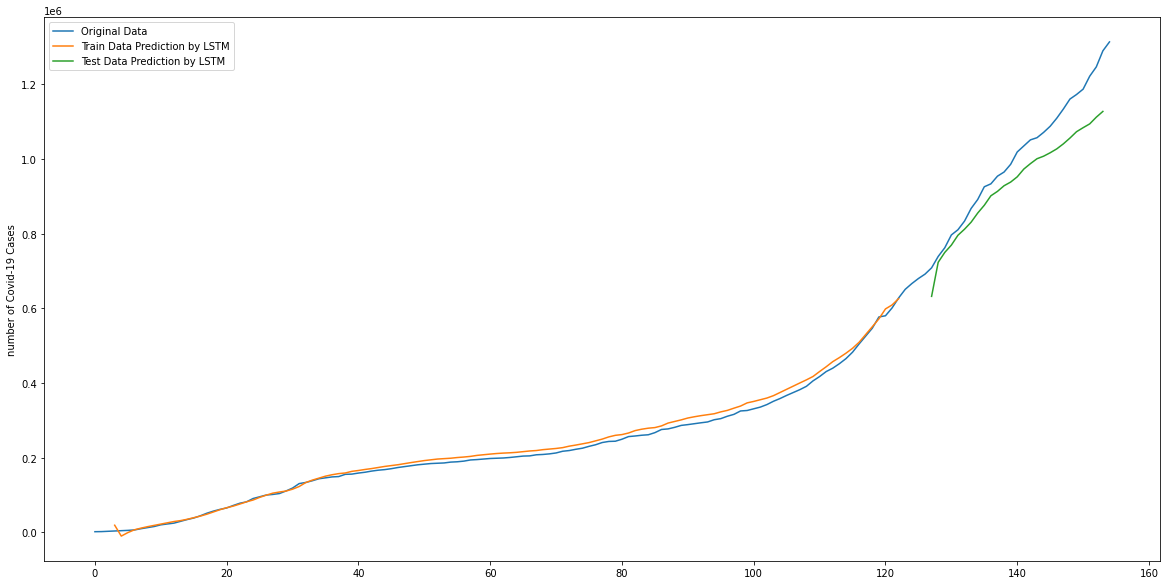

In [73]:
trainPredictPlot = np.empty_like(dataset )
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset )
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset )-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset ), label='Original Data')
plt.plot(trainPredictPlot, label='Train Data Prediction by LSTM')
plt.plot(testPredictPlot,label='Test Data Prediction by LSTM')
plt.ylabel('number of Covid-19 Cases')
plt.legend()
plt.show()

In [74]:
def GridSearch(dataset):

    from math import sqrt
    from multiprocessing import cpu_count
    from joblib import Parallel
    from joblib import delayed
    from warnings import catch_warnings
    from warnings import filterwarnings
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from sklearn.metrics import mean_squared_error

    # one-step sarima forecast
    def sarima_forecast(history, config):
        order, sorder, trend = config
        # define model
        model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
        # fit model
        model_fit = model.fit(disp=False)
        # make one step forecast
        yhat = model_fit.predict(len(history), len(history))
        return yhat[0]

    # root mean squared error or rmse
    def measure_rmse(actual, predicted):
        return sqrt(mean_squared_error(actual, predicted))

    # split a univariate dataset into train/test sets
    def train_test_split(data, n_test):
        return data[:-n_test], data[-n_test:]

    # walk-forward validation for univariate data
    def walk_forward_validation(data, n_test, cfg):
        predictions = list()
        # split dataset
        train, test = train_test_split(data, n_test)
        # seed history with training dataset
        history = [x for x in train]
        # step over each time-step in the test set
        for i in range(len(test)):
            # fit model and make forecast for history
            yhat = sarima_forecast(history, cfg)
            # store forecast in list of predictions
            predictions.append(yhat)
            # add actual observation to history for the next loop
            history.append(test[i])
        # estimate prediction error
        error = measure_rmse(test, predictions)
        return error

    # score a model, return None on failure
    def score_model(data, n_test, cfg, debug=False):
        result = None
        # convert config to a key
        key = str(cfg)
        # show all warnings and fail on exception if debugging
        if debug:
            result = walk_forward_validation(data, n_test, cfg)
        else:
            # one failure during model validation suggests an unstable config
            try:
                # never show warnings when grid searching, too noisy
                with catch_warnings():
                    filterwarnings("ignore")
                    result = walk_forward_validation(data, n_test, cfg)
            except:
                error = None
        # check for an interesting result
        if result is not None:
            print(' > Model[%s] %.3f' % (key, result))
        return (key, result)

    # grid search configs
    def grid_search(data, cfg_list, n_test, parallel=True):
        scores = None
        if parallel:
            # execute configs in parallel
            executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
            tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
            scores = executor(tasks)
        else:
            scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
        # remove empty results
        scores = [r for r in scores if r[1] != None]
        # sort configs by error, asc
        scores.sort(key=lambda tup: tup[1])
        return scores

    # create a set of sarima configs to try
    def sarima_configs(seasonal=[0]):
        models = list()
        # define config lists
        p_params = [x for x in range(15)]
        d_params = [0, 1]
        q_params = [0, 1, 2]
        t_params = ['n','c','t','ct']
        P_params = [0, 1, 2]
        D_params = [0, 1]
        Q_params = [0, 1, 2]
        m_params = seasonal
        # create config instances
        for p in p_params:
            for d in d_params:
                for q in q_params:
                    for t in t_params:
                        for P in P_params:
                            for D in D_params:
                                for Q in Q_params:
                                    for m in m_params:
                                        cfg = [(p,d,q), (P,D,Q,m), t]
                                        models.append(cfg)
        return models

    
    # define dataset
    data = dataset
    print(data)
    # data split
    n_test = 14
    # model configs
    cfg_list = sarima_configs()
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
        # list top 3 configs
    for cfg, error in scores[:3]:
      print(cfg, error)
